# CSE527 Homework1
**Due date: 23:59 on Feb 20, 2021 (Sat.)**

---
In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing 
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
``` 
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```  
    pip show pip
    pip --version
    pip -V
```

Incase of wrong version, use pip3 for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open the notebook file 'HW1.ipynb' with your Jupyter Notebook and do your homework there.*


## Example
---
Please read through the following examples where we apply image thresholding to an image. This example is desinged to help you get familiar with the basics of Python and routines of OpenCV. This part is for your exercises only, you do not need to submit anything from this part.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [4]:
# Replace '------' with the path such that "CSE527-20S-HW1" is your working directory
%cd '/content/drive/MyDrive/Courses/CV/homework/Bhide_Aditya Nandan_113216565_hw1'

/content/drive/MyDrive/Courses/CV/homework/Bhide_Aditya Nandan_113216565_hw1


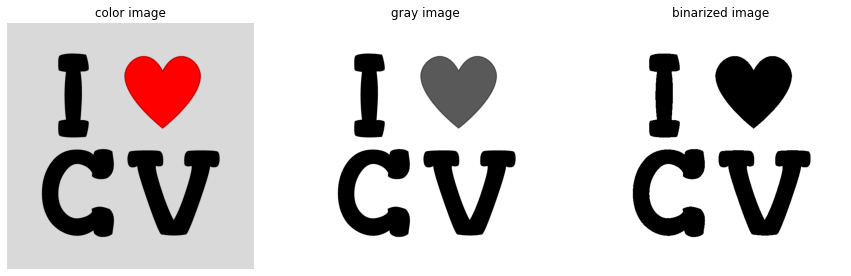

In [5]:
# function for image thresholding
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray
    
    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for x in range(height):
        for y in range(width):
            if img.item(x, y) > threshold:
                bi_img.itemset((x, y), maxVal)
                
    return bi_img

# read the image for local directory (same with this .ipynb) 
img = cv2.imread('SourceImages/IloveCV.png')

# convert a color image to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# image thresholding using global tresholder
img_bi = imThreshold(img_gray, 127, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a 
# color image read from OpenCV
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('color image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('gray image')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('binarized image')
plt.axis("off")

plt.show()

## Description
---
There are five basic image processing problems in total with specific instructions for each of them. Be sure to read **Submission Guidelines** below. They are important.

## Problems
---

- **Problem 1.a Gaussian filter {15 pts}:** 

  (a) Write a function that takes two arguments, a width parameter and a sigma parameter, and returns a 2D array containing a Gaussian kernel of the desired dimension and variance. The peak of the Gaussian should be in the center of the array. Make sure to normalize the kernel such that the sum of all the elements in the array is 1. Use this function and the OpenCV’s `filter2D` routine to convolve the image and noisy image arrays with a 5x5 Gaussian kernel of sigma=1 and a 11x11 Gaussian kernel of sigma=2. There will be four output images from this problem, namely, image convolved with 5x5, and 11x11, noisy image convolved with 5x5, and 11x11. 

  (b) Write a function that takes an image and its noisy version, and return the Peak Signal-to-Noise Ratio (PSNR) value. Refer to https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio for its mathematical form. Pay attention that you might need to do convertion between different data types.

  Once you fill in and run the codes, the outputs will be saved under `Results` folder. Also images will be displayed in the notebook with PSNR marked in the titles. Please only fill in the missing part as indicated by `##########--WRITE YOUR CODE HERE--##########` and do not modify other parts. The grading for this question will be based on the ground-truth PSNR and your results.

  Lena image is credit to https://www.ece.rice.edu/~wakin/images/.

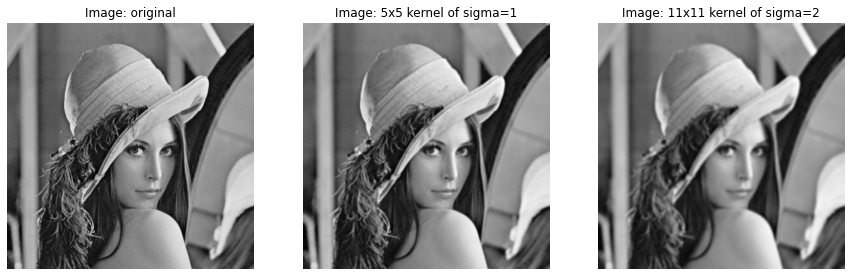

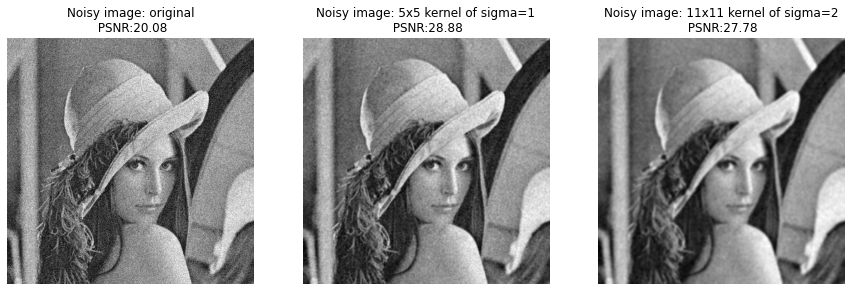

In [6]:
def genGaussianKernel(width, sigma):    
    ##########--WRITE YOUR CODE HERE--##########

    # Initialize kernel arra with zeroes
    kernel_2d = np.zeros((width, width), np.float32)

    a = width//2
    for x in range(-a, a+1):
        for y in range(-a, a+1):
            # Gaussian kernel 2D formula
            p1 = 2 * np.pi * (sigma**2)
            p2 = np.exp(-(x**2 + y**2) / (2* sigma**2))
            kernel_2d[x+a, y+a] = (1/p1)*p2
        
    # Normalized kernel to get sum of all 1
    kernel_2d = kernel_2d / kernel_2d.sum()
    ##########-------END OF CODE-------##########
    return kernel_2d

def PSNR(img, img_noise):
    ##########--WRITE YOUR CODE HERE--##########
    maxs = 255

    # Convert input in float32 format
    img = np.float32(img)
    img_noise = np.float32(img_noise)

    # Calculate Mean Square error
    MSE = np.square(img - img_noise).mean()

    # Calculate Peak signal-to-noise ratio
    PSNR = 10 * np.log10(((maxs ** 2) / MSE))
    ##########-------END OF CODE-------##########
    return PSNR
 
# Function to generate image with Gaussian noise
def addGaussianNoise(img, mean, std, seed=0):
    # suppose the input image is 2D gray image
    np.random.seed(seed)
    img_noise = img.astype(np.float32)/255.
    noise = np.random.normal(mean, std, img.shape)
    
    img_noise = img_noise + noise
    img_noise = np.clip(img_noise, 0., 1.)
    img_noise = (img_noise*255).astype(np.uint8)
    return img_noise

# Load images
img = cv2.imread('SourceImages/lena512.bmp', 0)

# Add Gaussian Noise
img_gnoise = addGaussianNoise(img, 0, 0.1)
PSNR_img_gnoise = PSNR(img, img_gnoise)

# Generate Gaussian kernels
kernel_1 = genGaussianKernel(5, 1)  # 5x5 kernel of sigma=1
kernel_2 = genGaussianKernel(11, 2)  # 11x11 kernel of sigma=2

# Convolve kernel with (noisy) image
img_kernel1 = cv2.filter2D(img, -1, kernel_1)
img_kernel2 = cv2.filter2D(img, -1, kernel_2)
img_gnoise_kernel1 = cv2.filter2D(img_gnoise, -1, kernel_1)
img_gnoise_kernel2 = cv2.filter2D(img_gnoise, -1, kernel_2)

PSNR_img_gnoise_kernel1 = PSNR(img, img_gnoise_kernel1)
PSNR_img_gnoise_kernel2 = PSNR(img, img_gnoise_kernel2)



# Write result images
if not os.path.exists("Results"):
  os.makedirs("Results")
cv2.imwrite("Results/P1_01.jpg", img_kernel1)
cv2.imwrite("Results/P1_02.jpg", img_kernel2)
cv2.imwrite("Results/P1_03.jpg", img_gnoise_kernel1)
cv2.imwrite("Results/P1_04.jpg", img_gnoise_kernel2)

# Plot results
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Image: original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_kernel1, 'gray')
plt.title('Image: 5x5 kernel of sigma=1')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_kernel2, 'gray')
plt.title('Image: 11x11 kernel of sigma=2')
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_gnoise, 'gray')
plt.title('Noisy image: original\n PSNR:{0:.2f}'.format(PSNR_img_gnoise))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gnoise_kernel1, 'gray')
plt.title('Noisy image: 5x5 kernel of sigma=1\n PSNR:{0:.2f}'
                        .format(PSNR_img_gnoise_kernel1))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_gnoise_kernel2, 'gray')
plt.title('Noisy image: 11x11 kernel of sigma=2\n PSNR:{0:.2f}'
                        .format(PSNR_img_gnoise_kernel2))
plt.axis("off")

plt.show()


- **Problem 1.b Median filter {15 pts}:** \\
(a) Write a function to generate an image with salt and pepper noise. The function takes three arguments, the input image, the probability that a pixel location has salt-pepper noise and a random seed for repitability. A simple implementation can be to select pixel locations with probability 'p' where noise occurs and then with equal probability set the pixel value at those location to be 0 or 255.(**Hint: Use np.random.uniform and np.random.choice**) 

 (b) Write a function to implement a median filter. The function takes two arguments, an image and a window size (if window size is 'k', then a kxk window is used to determine the median pixel value at a location) and returns the output image. **Do not** use any inbuilt library (like scipy.ndimage_filter) to directly generate the result. (**Hint: Use cv2.copyMakeBorder to add borders**)  

 You need to generate two noisy images corrupted by salt-and-pepper noise with noise probability equals 0.1 and 0.2. And then use median filter of window size=5 to denoise the two noisy images. You also need to denoise them with Gaussian filters. Try different parameters of Gaussian filters to get as higher PSNR as possible. Fill in all the missing parts and do not modify others.


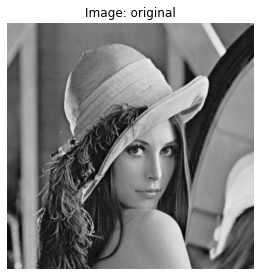

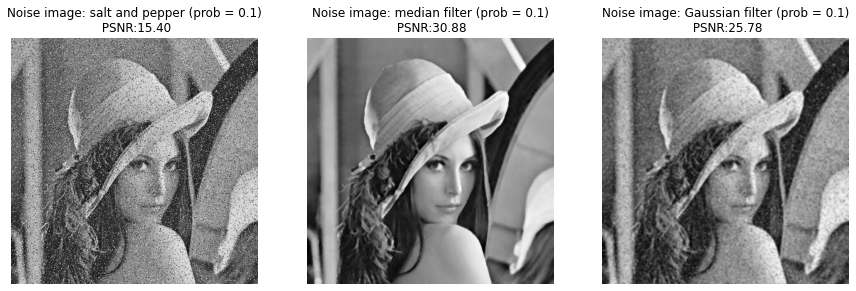

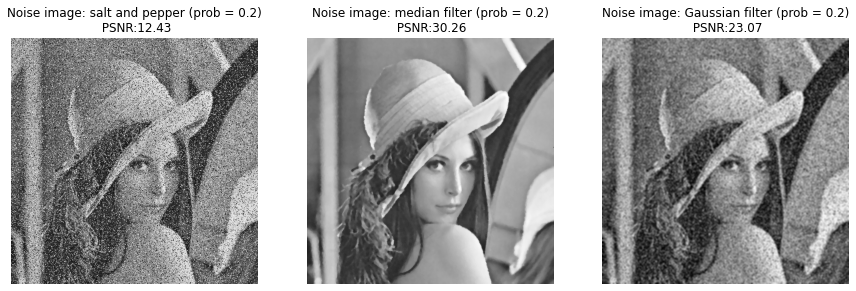

In [7]:
  # Function to generate image with salt and pepper noise
def addSaltPepperNoise(img, prob=0.1, seed=0):
    # suppose the input image is 2D gray image
    # with probability=prob each pixel is replaced with a pepper(0)
    # or a salt(255) in equal chance
    np.random.seed(seed)  
    ##########--WRITE YOUR CODE HERE--##########
    # Create a 2D array with uniform destribution of numbers with all values below 1
    probs = np.float32(np.random.uniform(0.0, 1.0, (512, 512)))
    img_noise = img.copy()
    # Iterate through image for each pixel value
    for i in range(0, 512):
        for j in range(0,512):
            # Replace pixel with 0 or 255 with probability 0.1
            if probs[i][j] < prob:
                # Selct Between salt and paper
                img_noise[i][j] = np.random.choice([0, 255])

    ##########-------END OF CODE-------##########
    return img_noise
  
# Function to apply median filter (window size kxk) on the input image  
def medianFilter(img, window_size = 5):
    ##########--WRITE YOUR CODE HERE--##########
    img_filtered = img.copy()
    half = window_size // 2

    # Padding with zeroes will make corners zero after taking median.
    # BORDER_REPLICATE will give more accurate answer.
    img_padded = cv2.copyMakeBorder(img, half, half, half, half, cv2.BORDER_REPLICATE)

    # Pass kernel through image with 5X5 slicing
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            # Take median of the sliced part
            img_filtered[i][j] = np.median(img_padded[i:i+5, j:j+5])

    ##########-------END OF CODE-------##########
    return img_filtered
  
img_spnoise_p1 = addSaltPepperNoise(img, 0.1)
PSNR_img_spnoise_p1 = PSNR(img, img_spnoise_p1)

img_spnoise_p1_MedianFilter = medianFilter(img_spnoise_p1)
PSNR_img_spnoise_p1_MedianFilter = PSNR(img, img_spnoise_p1_MedianFilter)

img_spnoise_p2 = addSaltPepperNoise(img, 0.2)
PSNR_img_spnoise_p2 = PSNR(img, img_spnoise_p2)

img_spnoise_p2_MedianFilter = medianFilter(img_spnoise_p2)
PSNR_img_spnoise_p2_MedianFilter = PSNR(img, img_spnoise_p2_MedianFilter)

# Generate Gaussian kernels
kernel_1 =  genGaussianKernel(5, 2)
kernel_2 =  genGaussianKernel(5, 2)

# Convolve filters with image and noisy image
img_spnoise_p1_GaussianFilter = cv2.filter2D(img_spnoise_p1, -1, kernel_1)
PSNR_img_spnoise_p1_GaussianFilter = PSNR(img, img_spnoise_p1_GaussianFilter)

img_spnoise_p2_GaussianFilter = cv2.filter2D(img_spnoise_p2, -1, kernel_2)
PSNR_img_spnoise_p2_GaussianFilter = PSNR(img, img_spnoise_p2_GaussianFilter)

cv2.imwrite("Results/P1_05.jpg", img_spnoise_p1_MedianFilter)    
cv2.imwrite("Results/P1_06.jpg", img_spnoise_p1_GaussianFilter)    
cv2.imwrite("Results/P1_07.jpg", img_spnoise_p2_MedianFilter)    
cv2.imwrite("Results/P1_08.jpg", img_spnoise_p2_GaussianFilter)  

# Plot results
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Image: original')
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_spnoise_p1, 'gray')
plt.title('Noise image: salt and pepper (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_spnoise_p1_MedianFilter, 'gray')
plt.title('Noise image: median filter (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1_MedianFilter))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_spnoise_p1_GaussianFilter, 'gray')
plt.title('Noise image: Gaussian filter (prob = 0.1)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p1_GaussianFilter))
plt.axis("off")

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_spnoise_p2, 'gray')
plt.title('Noise image: salt and pepper (prob = 0.2)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p2))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_spnoise_p2_MedianFilter, 'gray')
plt.title('Noise image: median filter (prob = 0.2)\n PSNR:{0:.2f}'
                .format(PSNR_img_spnoise_p2_MedianFilter))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_spnoise_p2_GaussianFilter, 'gray')
plt.title('Noise image: Gaussian filter (prob = 0.2)\n PSNR:{0:.2f}'
                  .format(PSNR_img_spnoise_p2_GaussianFilter))
plt.axis("off")

plt.show()

- **Problem 2 Separable filters {10 pts}:** The Gaussian kernel is separable, which means that convolution with a 2D Gaussian can be accomplished by convolving the image with two 1D Gaussians, one in the x direction and the other one in the y direction. Perform an 11x11 convolution with sigma = 3 from question 1 using this scheme. You can still use `filter2D` to convolve the images with each of the 1D kernels. Verify that you get the same results with what you did with 2D kernels by computing the difference image between the results from the two methods. This difference image should be close to black. Include your code and results in your colab Notebook file. There is no output image from this part. Be sure to display the result images in the notebook.

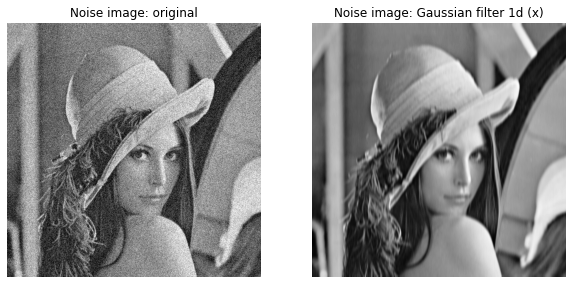

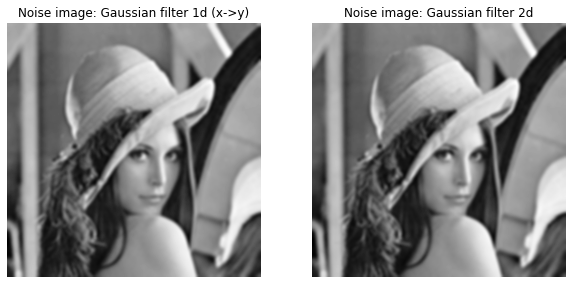

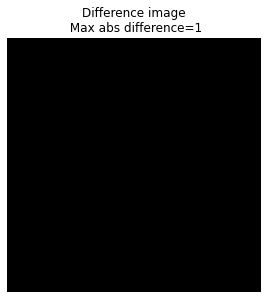

In [8]:
def genGausKernel1D(length, sigma):
    ##########--WRITE YOUR CODE HERE--##########
    kernel_1d = np.zeros(length, np.float32)
    a = width//2
    for x in range(-a, a+1):
        p1 = np.sqrt(2 * np.pi) * (sigma)
        p2 = np.exp(-((x**2) / (2 * (sigma**2))))
        kernel_1d[x+a] = (1/p1) * p2

    # Normalize the kernel to get sum of all 1
    kernel_1d = kernel_1d / kernel_1d.sum()
    ##########-------END OF CODE-------##########
    return kernel_1d

# Generate two 1d kernels here
width = 11
sigma = 3
kernel_x = genGausKernel1D(width, sigma)
kernel_y = kernel_x.reshape(1, width)

# Generate a 2d 11x11 kernel with sigma of 3 here as before
kernel_2d = genGaussianKernel(width, sigma)

# Convolve with img_gnoise
img_gnoise_kernel1d_x = cv2.filter2D(img, -1, kernel_x)
img_gnoise_kernel1d_xy = cv2.filter2D(img_gnoise_kernel1d_x, -1, kernel_y)
img_gnoise_kernel2d = cv2.filter2D(img, -1, kernel_2d)

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gnoise, 'gray')
plt.title('Noise image: original')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_gnoise_kernel1d_x, 'gray')
plt.title('Noise image: Gaussian filter 1d (x)')
plt.axis("off")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gnoise_kernel1d_xy, 'gray')
plt.title('Noise image: Gaussian filter 1d (x->y)')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_gnoise_kernel2d, 'gray')
plt.title('Noise image: Gaussian filter 2d')
plt.axis("off")

# Compute the difference array here
img_diff =  np.abs((img_gnoise_kernel1d_xy.astype(np.float32)
       -img_gnoise_kernel2d.astype(np.float32))).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.imshow(img_diff, 'gray', vmin=0, vmax=255)
plt.title('Difference image\n Max abs difference={0:d}'
                        .format(np.max(img_diff)))
plt.axis("off")
plt.show()

- **Problem 3 Difference of Gaussians {20 pts}:** Difference of Gaussians (DoG) is a feature enhancement algorithm. You can obtain a DoG by subtracting a Gaussian filter of sigma=K\*s from a Gaussian filter of sigma=s. In this question, we will use K=1.6 and sigma=2. Plot the DoG kernel using the `Matplotlib` function `plot`. Use the `Matplotlib` function `plot_surface` to generate a 3D plot of DoG. Include your code and results in your Colab Notebook file. Apply the filter to the noisy image generated in the previous question. 

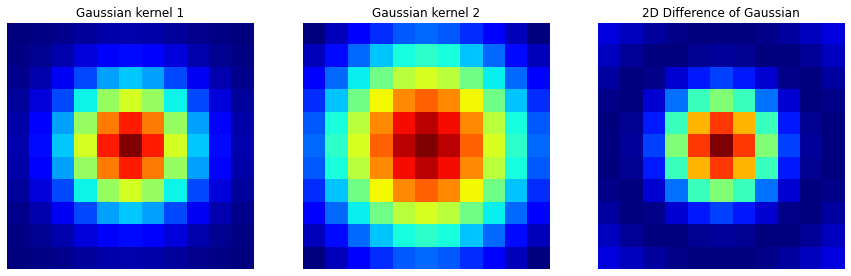

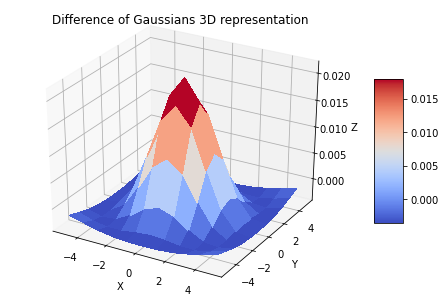

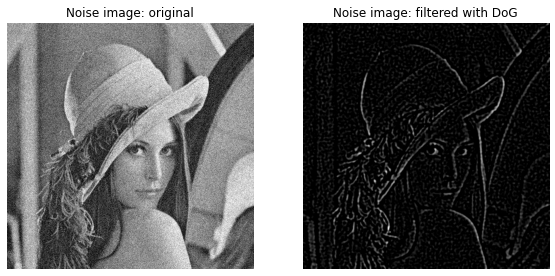

In [9]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter

kernel_size = 11
sigma = 2
k = 1.6

# Create your Gaussian kernel
Gaussian_kernel_1 = genGaussianKernel(kernel_size, sigma)
Gaussian_kernel_2 = genGaussianKernel(kernel_size, k * sigma)

# Create your Difference of Gaussian
DoG = Gaussian_kernel_1 - Gaussian_kernel_2

# Plot Gaussian and Laplacian
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(Gaussian_kernel_1, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel 1')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(Gaussian_kernel_2, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel 2')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(DoG, interpolation='none', cmap=cm.jet)
plt.title('2D Difference of Gaussian')
plt.axis("off")

# Plot the 3D figure of DoG
##########--WRITE YOUR CODE HERE--##########
# Calculate X, Y and Z
X = np.outer(np.linspace(-(kernel_size//2), kernel_size//2, kernel_size), np.ones(kernel_size))
Y = X.copy().T
Z = DoG


fig = plt.figure()
ax = Axes3D(fig)
plt.title('Difference of Gaussians 3D representation')
plot = ax.plot_surface(X, Y, Z,cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a color bar which maps values to colors.
fig.colorbar(plot, shrink=0.5, aspect=5)
plt.show()
##########-------END OF CODE-------##########

img_gnoise_DoG = cv2.filter2D(img_gnoise, -1, DoG)

# Plot results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_gnoise, 'gray')
plt.title('Noise image: original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gnoise_DoG, 'gray')
plt.title('Noise image: filtered with DoG')
plt.axis("off")

cv2.imwrite("Results/P3_01.jpg", img_gnoise_DoG);


- **Problem 4 Histogram equalization {20 pts}:** Refer to Szeliski's book on section 3.4.1, and within that section to eqn 3.9 for more information on histogram equalization. Getting the histogram of a grayscale image is incredibly easy with python. A histogram is a vector of numbers. Once you have the histogram, you can get the cumulative distribution function (CDF) from it. Then all you have left is to find the mapping from each value [0,255] to its adjusted value (just using the CDF basically). **DO NOT** use **cv2.equalizeHist()** directly to solve the exercise! We will expect to see in your code that you get the PDF and CDF, and that you manipulate the pixels directly (avoid a for loop, though). The ground-truth image is credit to https://github.com/yinhaoz/denoising-fluorescence. It is a real Fluorescence Microscopy Image with three R/G/B channels. You need to transform it into HSV space before doing histogram equalization. There will be one output image from this part which is the histogram equalized image. It will be compared against the ground truth.

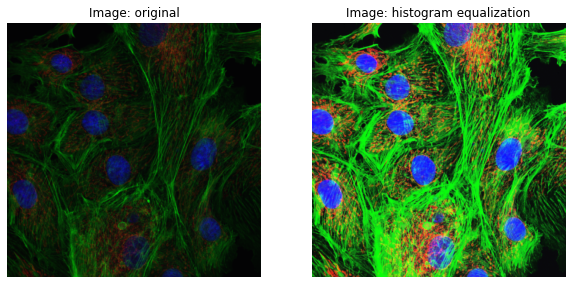

In [10]:
def histogram_equalization(img):
    ##########--WRITE YOUR CODE HERE--##########
    # Conver BGR input to HSV format
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Get last V channel of HSV image
    v = img_hsv[:,:,2]

    # Calculate PDF
    count = np.zeros((256))
    for i in v.flatten():
        count[i] += 1
    pdf = (count.astype(np.uint64))/len(v.flatten())

    # Calculate CDF
    cdf = np.zeros((256))
    temp = 0
    for i in range(0, len(pdf)):
        temp += pdf[i]
        cdf[i] = temp

    # Calculate histogram equalized value(ref: https://en.wikipedia.org/wiki/Histogram_equalization)
    p1 = ((cdf - cdf.min()) / (cdf.max() - cdf.min()))
    p2 = p1 * 255 + 1
    equalized = p2
    
    # Replace V channel of original image with histogram equalized V channel
    img_hsv[:,:,2] = equalized[v]

    # Convert back to BGR format from HSV
    img_hist_eq = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)
    ##########-------END OF CODE-------##########
    return img_hist_eq

# Read in input images
imgB = cv2.imread('SourceImages/BPAE_Cells.png', cv2.IMREAD_COLOR)

# Histogram equalization
imgB_hist_eq = histogram_equalization(imgB)

# Plot results
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB))
plt.title('Image: original')
plt.axis("off")

# Plot results
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imgB_hist_eq, cv2.COLOR_BGR2RGB))
plt.title('Image: histogram equalization')
plt.axis("off")

# Write out results
cv2.imwrite("Results/P4_01.jpg", imgB_hist_eq);

- **Problem 5 Low/high pass filters and image sharpen {20 pts}:**  Start with the following tutorials: \\
http://docs.opencv.org/master/de/dbc/tutorial_py_fourier_transform.html
http://docs.opencv.org/2.4/doc/tutorials/core/discrete_fourier_transform/discrete_fourier_transform.html <br>

 For your LPF (low pass filter), mask a 80x80 window of the center of the FT (Fourier Transform) image (the low frequencies). For the HPF, mask a 60x60 window excluding the center. You may need to do low/high pass filter for each R/G/B channel. The filtered low and high pass images will be displayed and saved.

 Then you will need to do image sharpen by mixing the high pass filtered image with the original one. Write a function that takes two images and a coefficient alpha and return the mixed image. Use alpha=2 in this question. The sharpened image will be displayed and saved.

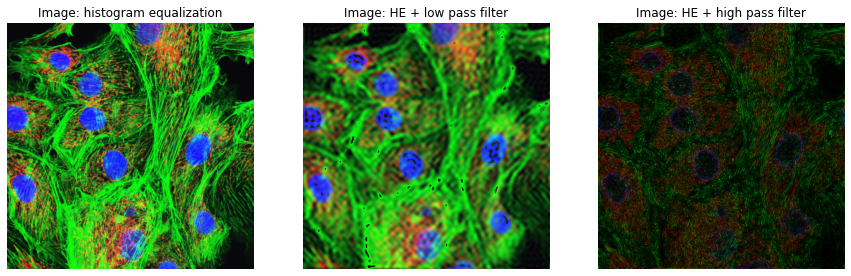

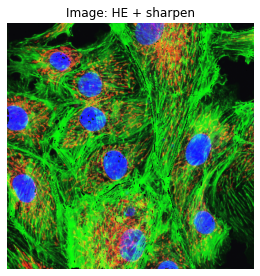

In [11]:
def low_pass_filter(img_in, mask_size):
    ##########--WRITE YOUR CODE HERE--########## 
    img_out = np.float64(img_in.copy())

    # Split 3 channels of image
    b, g, r = img_out[:,:,0], img_out[:,:,1], img_out[:,:,2]


    row, col = img.shape[0], img.shape[1]
    half_mask = mask_size//2
    mrow, mcol = row//2, col//2

    # Apply Fast Fourier transform and shift on red channel
    f_r = np.fft.fft2(r)
    r_fshift = np.fft.fftshift(f_r)

    # Apply Fast Fourier transform and shift on green channel
    f_g = np.fft.fft2(g)
    g_fshift = np.fft.fftshift(f_g)

    # Apply Fast Fourier Transform and shift on blue channel
    f_b = np.fft.fft2(b)
    b_fshift = np.fft.fftshift(f_b)

    # Create a copy of all converted channels
    r_temp = r_fshift.copy()
    g_temp = g_fshift.copy()
    b_temp = b_fshift.copy()

    # We need to keep 80X80 square at center
    # Multiply values of inner mask size by 2 to get 
    r_temp[mrow - half_mask : mrow + half_mask, mcol - half_mask : mcol + half_mask] *= 2
    g_temp[mrow - half_mask : mrow + half_mask, mcol - half_mask : mcol + half_mask] *= 2
    b_temp[mrow - half_mask : mrow + half_mask, mcol - half_mask : mcol + half_mask] *= 2

    # Subtracting old  from copied channel with doubled center square,
    # We will get cropped innner square of the original image
    r_fshift = r_temp - r_fshift
    g_fshift = g_temp - g_fshift
    b_fshift = b_temp - b_fshift

    # Apply Inverse Fast Fourier Transform to get original red channel form
    r_f_ishift = np.fft.ifftshift(r_fshift)
    r_img_back = np.fft.ifft2(r_f_ishift)
    # We only need the real part of the complex number returned by the 'iff2' funiton
    r_img_out = np.real(r_img_back)

    # Apply Inverse Fast Fourier Transform to get original green channel form
    g_f_ishift = np.fft.ifftshift(g_fshift)
    g_img_back = np.fft.ifft2(g_f_ishift)
    g_img_out = np.real(g_img_back)

    # Apply Inverse Fast Fourier Transform to get original blue channel form
    b_f_ishift = np.fft.ifftshift(b_fshift)
    b_img_back = np.fft.ifft2(b_f_ishift)
    b_img_out = np.real(b_img_back)

    # Combine all channels to get new image
    img_out[:,:,0], img_out[:,:,1], img_out[:,:,2] = b_img_out, g_img_out, r_img_out
    
    ##########-------END OF CODE-------##########    
    return np.abs(img_out).astype('uint8')


def high_pass_filter(img_in, mask_size):
    ##########--WRITE YOUR CODE HERE--##########

    # Split 3 channels of image
    img_out = np.float64(img_in.copy())
    b, g, r = img_out[:,:,0], img_out[:,:,1], img_out[:,:,2]
    
    row, col = img.shape[0], img.shape[1]
    half_mask = mask_size//2
    mrow, mcol = row//2, col//2

    # Apply Fast Fourier transform and shift on red channel
    f_r = np.fft.fft2(r)
    r_fshift = np.fft.fftshift(f_r)

    # Apply Fast Fourier transform and shift on green channel 
    f_g = np.fft.fft2(g)
    g_fshift = np.fft.fftshift(f_g)

    # Apply Fast Fourier transform and shift on blue channel
    f_b = np.fft.fft2(b)
    b_fshift = np.fft.fftshift(f_b)

    # Cropout and remove 60X60 square by assigning it to zero
    r_fshift[mrow - half_mask : mrow + half_mask, mcol - half_mask : mcol + half_mask] = 0
    b_fshift[mrow - half_mask : mrow + half_mask, mcol - half_mask : mcol + half_mask] = 0
    g_fshift[mrow - half_mask : mrow + half_mask, mcol - half_mask : mcol + half_mask] = 0

    # Apply Inverse Fast Fourier Transform to get original red channel form
    r_f_ishift = np.fft.ifftshift(r_fshift)
    r_img_back = np.fft.ifft2(r_f_ishift)
    # We only need the real part of the complex number returned by the 'iff2' funiton
    r_img_out = np.real(r_img_back)

    # Apply Inverse Fast Fourier Transform to get original green channel form
    g_f_ishift = np.fft.ifftshift(g_fshift)
    g_img_back = np.fft.ifft2(g_f_ishift)
    g_img_out = np.real(g_img_back)

    # Apply Inverse Fast Fourier Transform to get original blue channel form         
    b_f_ishift = np.fft.ifftshift(b_fshift)
    b_img_back = np.fft.ifft2(b_f_ishift)
    b_img_out = np.real(b_img_back)

    img_out[:,:,0], img_out[:,:,1], img_out[:,:,2] = b_img_out, g_img_out, r_img_out

    ##########-------END OF CODE-------##########   
    return np.abs(img_out).astype('uint8')

def mixImages(img_a, img_b, alpha=0.1):
    # alpha is the weight of img_b
    ##########--WRITE YOUR CODE HERE--##########
    img_mix = np.zeros(img_a.shape,dtype=img_a.dtype)
    img_mix[:,:,:] = (img_a[:,:,:]) + (alpha * img_b[:,:,:])
    ##########-------END OF CODE-------########## 
    return img_mix

# Low and high pass filter
imgB_hist_eq_lp  = low_pass_filter(imgB_hist_eq, 80)
imgB_hist_eq_hp = high_pass_filter(imgB_hist_eq, 60)

# Plot results
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imgB_hist_eq, cv2.COLOR_BGR2RGB))
plt.title('Image: histogram equalization')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(imgB_hist_eq_lp, cv2.COLOR_BGR2RGB))
plt.title('Image: HE + low pass filter')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(imgB_hist_eq_hp, cv2.COLOR_BGR2RGB))
plt.title('Image: HE + high pass filter')
plt.axis("off")

# Write out results
cv2.imwrite("Results/P5_01.jpg", imgB_hist_eq_lp);
cv2.imwrite("Results/P5_02.jpg", imgB_hist_eq_hp);

# threshold out low values
mask_sharpen = (imgB_hist_eq_hp>20).astype(np.uint8)
imgB_hist_eq_sharpen = mixImages(imgB_hist_eq, imgB_hist_eq_hp*mask_sharpen, 0.2)

fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imgB_hist_eq_sharpen, cv2.COLOR_BGR2RGB))
plt.title('Image: HE + sharpen')
plt.axis("off");

cv2.imwrite("Results/P5_03.jpg", imgB_hist_eq_sharpen);

## Submission guidelines
---
Your need to submit a single zip file to Blackboard described as follow.

Please generate a pdf file that includes a ***google shared link*** (explained in the next paragraph). This pdf file should be named as ***Surname_Givenname_SBUID_hw*\*.pdf** (example: LeCun_Yann_111234567_hw1.pdf for this assignment).

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_SBUID_hw**** in your Google Drive with your Stony Brook account. The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Surname_Givenname_SBUID_hw1
        |---Results
        |---SourceImages
        |---CSE527-20S-HW1.ipynb
```
Note that this folder should be in your Google Drive with your Stony Brook account.

Then right click this folder, click ***Get shareable link***, in the People textfield, enter two TA's emails: ***tao.sun.1@stonybrook.edu*** and ***kunal.kolhe@stonybrook.edu***. Make sure that TAs who have the link **can edit**, ***not just*** **can view**, and also **uncheck** the **Notify people** box.

Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in blackboard. 

To submit to Blackboard, zip ***Surname_Givenname_SBUID_hw*\*.pdf** and ***Surname_Givenname_SBUID_hw**** folder together and name your zip file as ***Surname_Givenname_SBUID_hw*\*.zip**. 

The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_SBUID_hw1' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be dealys in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.

Late submission penalty: <br>
There will be a 10% penalty per day for late submission. However, you will have 4 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.
